## Replace CZ with CNOT 

In [19]:
import qiskit
from qiskit import QuantumCircuit
from qiskit import ignis
import numpy as np
from qiskit import Aer
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt
from qiskit.aqua.components.optimizers import AQGD

In [20]:
from typing import List

class MyCircuit():
    def __init__(self, Ly_num: int, phi: List):
        self.Ly_num = Ly_num
        self.phi = phi
    
    def MyCost(self, x: List):
        lg = len(x)
        if(lg % 2 == 1): return -1
        theta_o = x[0:int(lg/2)]
        theta_e = x[int(lg/2):lg]
        
        if(self.Ly_num * 4 != len(theta_o) or self.Ly_num * 4  != len(theta_e)): return -1

        # Construct a circuit
        myqc = QuantumCircuit(4,2)

        for i in range(self.Ly_num):
            Layer(myqc, theta_o[4*i : 4 * i + 4], theta_e[4*i : 4 * i + 4])

        # To draw
#         myqc.draw(output='mpl', filename='my_circuit.png')
#         plt.show()
#         print(myqc)

        # Run the quantum circuit on a statevector simulator backend
        backend = Aer.get_backend('statevector_simulator')

        # Create a Quantum Program for execution
        job = qiskit.execute(myqc, backend)
        result = job.result()

        # output
        outputstate = result.get_statevector(myqc, decimals=5)

        # calculate distance
        dist = Dist(outputstate, self.phi)
        return dist

    def MyCost_draw(self, x: List):
        lg = len(x)
        if(lg % 2 == 1): return -1
        theta_o = x[0:int(lg/2)]
        theta_e = x[int(lg/2):lg]
        
        if(self.Ly_num * 4 != len(theta_o) or self.Ly_num * 4  != len(theta_e)): return -1

        # Construct a circuit
        myqc = QuantumCircuit(4,2)

        for i in range(self.Ly_num):
            Layer(myqc, theta_o[4*i : 4 * i + 4], theta_e[4*i : 4 * i + 4])

        # To draw
        myqc.draw(output='mpl', filename='my_circuit.png')
        plt.show()
        print(myqc)

        # Run the quantum circuit on a statevector simulator backend
        backend = Aer.get_backend('statevector_simulator')

        # Create a Quantum Program for execution
        job = qiskit.execute(myqc, backend)
        result = job.result()

        # output
        outputstate = result.get_statevector(myqc, decimals=5)

        # calculate distance
        dist = Dist(outputstate, self.phi)
        return dist


def Cost(Ly_num, theta_o: List, theta_e: List, phi: List):
    
    if(Ly_num * 4 != len(theta_o) or Ly_num * 4  != len(theta_e)): return -1

    # Construct a circuit
    myqc = QuantumCircuit(4,2)

    for i in range(Ly_num):
        Layer(myqc, theta_o[4*i : 4 * i + 4], theta_e[4*i : 4 * i + 4])
        
    myqc.draw(output='mpl', filename='my_circuit.png')
    plt.show()
    print(myqc)

    # Run the quantum circuit on a statevector simulator backend
    backend = Aer.get_backend('statevector_simulator')

    # Create a Quantum Program for execution
    job = qiskit.execute(myqc, backend)
    result = job.result()
    
    # output
    outputstate = result.get_statevector(myqc, decimals=5)
    
    # calculate distance
    dist = Dist(outputstate, phi)
    return dist

def Plot_rho(outputstate):
    plot_state_city(outputstate)


def Even_blocks(qc: QuantumCircuit, theta: List):
    lg = len(theta)
    lg_qc = qc.n_qubits
    if(lg != lg_qc): return
    
    for i in range(lg):
        qc.rz(theta[i], i)
        
    for i in range(lg - 1):
        for j in range(i + 1, lg):
            qc.cx(i, j)
    return

def Odd_blocks(qc: QuantumCircuit, theta: List):
    lg = len(theta)
    lg_qc = qc.n_qubits
    if(lg != lg_qc): return
    
    for i in range(lg):
        qc.rx(theta[i], i)
    return
    
def Layer(qc: QuantumCircuit, theta_o: List, theta_e: List):
    Odd_blocks(qc, theta_o)
    Even_blocks(qc, theta_e)
    return

    

def Dist(v1, v2)->float:
    lg1 = len(v1)
    lg2 = len(v2)
    if(lg1 != lg2): return -1
    
    ans = np.linalg.norm(abs(v1 - v2))
    return ans


##################

def MyOptimizer(Lyer_num, phi)->List:
    c = MyCircuit(Lyer_num, phi)
    
    x0 = np.zeros(8 * Lyer_num)
    mycost0 = c.MyCost(x0)
    print('cost0 = ', mycost0)
    
    # Calculate gradient
    s = AQGD(maxiter= 500, eta=0.8)

    # optimize
    result = s.optimize(8 * Lyer_num, c.MyCost, gradient_function = None, variable_bounds=None, initial_point=x0 )
    
    return result




In [21]:
# generate an arbitrary state
# from random import*
# phi = np.zeros(16, dtype = complex)
# buf = 0
# for i in range(16):
#     phi[i] = random() + random() * 1j
#     buf += abs(phi[i])**2
# phi /= np.sqrt(buf)
# print('\nphi = ', phi, '\n')


### 0 ###
# phi =  [0.05296575+0.12553443j, 0.14148584+0.0344995j,  0.01116246+0.23971682j,
#  0.18704239+0.25686473j, 0.24088228+0.1558352j,  0.23051833+0.21016748j,
#  0.21130526+0.09362266j, 0.20546542+0.24273953j, 0.20291975+0.2126299j,
#  0.21688792+0.10507138j, 0.19467199+0.24528609j, 0.23866276+0.05311222j,
#  0.1434255 +0.16579532j, 0.1779622 +0.15191071j, 0.04109471+0.08932408j,
#  0.06971626+0.21876191j] 

### 1 ###
# phi = [0.28595329+0.07688487j, 0.11346775+0.18084348j, 0.09831658+0.23748216j,
#  0.04790251+0.19886658j, 0.14698497+0.19633826j, 0.23695686+0.05193734j,
#  0.27073984+0.09877088j, 0.2755695 +0.02526556j, 0.09535118+0.11588199j,
#  0.18528336+0.17320486j, 0.15252363+0.28401945j, 0.28710467+0.28407052j,
#  0.21305098+0.10972472j, 0.10863711+0.06476885j, 0.19236945+0.09682989j,
#  0.08017145+0.00767616j]


### 2 ###
phi =  [0.02028168+0.01119596j, 0.21772834+0.1242118j,  0.24896595+0.23751685j,
 0.15451236+0.21548788j ,0.19406331+0.10044912j ,0.06053239+0.25080864j,
 0.01214387+0.25685086j, 0.19708191+0.22064238j ,0.24752157+0.12871876j,
 0.042375  +0.12651454j, 0.16213547+0.26485835j, 0.12757956+0.04251901j,
 0.25120959+0.04842543j ,0.21927224+0.11638648j, 0.14975286+0.10633072j,
 0.24081764+0.22582253j] 

In [22]:
# Run single case
Lyer_num = 3
c = MyCircuit(Lyer_num, phi)
x0 = np.zeros(8 * Lyer_num)
mycost0 = c.MyCost_draw(x0)
print('cost0 = ', mycost0)

<ipython-input-20-f7079f010a75>:122: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  lg_qc = qc.n_qubits
<ipython-input-20-f7079f010a75>:109: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  lg_qc = qc.n_qubits


     ┌───────┐┌───────┐               ┌───────┐┌───────┐                  »
q_0: ┤ RX(0) ├┤ RZ(0) ├──■────■────■──┤ RX(0) ├┤ RZ(0) ├──────────────────»
     ├───────┤├───────┤┌─┴─┐  │    │  └───────┘└───────┘┌───────┐┌───────┐»
q_1: ┤ RX(0) ├┤ RZ(0) ├┤ X ├──┼────┼──────■────────■────┤ RX(0) ├┤ RZ(0) ├»
     ├───────┤├───────┤└───┘┌─┴─┐  │    ┌─┴─┐      │    └───────┘├───────┤»
q_2: ┤ RX(0) ├┤ RZ(0) ├─────┤ X ├──┼────┤ X ├──────┼────────■────┤ RX(0) ├»
     ├───────┤├───────┤     └───┘┌─┴─┐  └───┘    ┌─┴─┐    ┌─┴─┐  ├───────┤»
q_3: ┤ RX(0) ├┤ RZ(0) ├──────────┤ X ├───────────┤ X ├────┤ X ├──┤ RX(0) ├»
     └───────┘└───────┘          └───┘           └───┘    └───┘  └───────┘»
c: 2/═════════════════════════════════════════════════════════════════════»
                                                                          »
«                        ┌───────┐┌───────┐                                »
«q_0: ────■──────■────■──┤ RX(0) ├┤ RZ(0) ├──────────────────────■──────■──»
«       ┌─

In [23]:
# Run series of QC

Lyer_List = range(1, 10)
dist_List = np.ones(len(Lyer_List))

for i in range(len(Lyer_List)):
    Lyer_num = Lyer_List[i]
    myresult = MyOptimizer(Lyer_num, phi)
    print(myresult)
    dist_List[i] = myresult[1]
    print('layer_num = ', Lyer_num, ', distance = ', myresult[1], '\n')

cost0 =  1.3997987818193767


<ipython-input-20-f7079f010a75>:122: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  lg_qc = qc.n_qubits
<ipython-input-20-f7079f010a75>:109: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  lg_qc = qc.n_qubits


(array([-1.55706699, -1.59417592,  1.92842143, -1.64051127, -1.16898724,
       -0.97247769,  1.84722902, -1.64875994]), 0.4768747859820899, 66)
layer_num =  1 , distance =  0.4768747859820899 

cost0 =  1.3997987818193767
(array([-1.4623677 , -1.23416552,  1.76597785, -1.42231694, -0.46658311,
       -2.46813303,  0.80279317,  0.27482322, -1.2548758 , -1.7468608 ,
        1.39328859, -1.41325607, -0.23425917,  0.27175916, -0.11220942,
       -0.31609189]), 0.33280695742030597, 500)
layer_num =  2 , distance =  0.33280695742030597 

cost0 =  1.3997987818193767
(array([-1.84534233, -0.37454332, -1.57596124, -1.11466978, -0.75794069,
       -0.17510192,  0.15078327, -0.45486921, -0.50131247, -0.59432197,
       -0.51137007, -0.29960831, -1.09154   , -0.02600262, -1.79400229,
       -0.63578617, -0.66868872, -0.06220048,  0.00619394,  0.26922933,
        0.53895008, -1.21538256, -0.07904416, -1.34554026]), 0.3001743067066101, 500)
layer_num =  3 , distance =  0.3001743067066101 

cost0 = 

In [24]:
## save text
np.savetxt('result_CNOT_2.txt', (Lyer_List, dist_List), delimiter=',') 

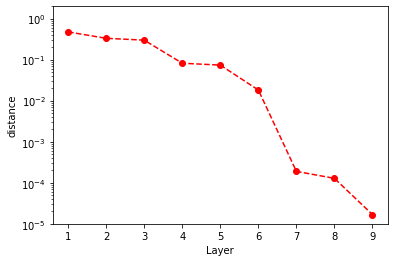

In [25]:
## load txt
data = np.loadtxt('result_CNOT_2.txt', delimiter=',') 

## save graph file
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data[0], data[1], 'ro--')
ax.set_ylim([1E-5, 2]) 
ax.set_yscale('log')
ax.set_xlabel('Layer')
ax.set_ylabel('distance')
plt.savefig('result_CNOT_2.pdf')
plt.show()


